# digit 데이터 딥러닝

- random = 2020
- train / test = 8:2
- validation = 0.2

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.target.shape

(1797,)

In [7]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.1.0'

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
seed = 150
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
X = digits.data
Y = digits.target
X.shape, Y.shape

((1797, 64), (1797,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,
                                                    random_state = 2020)

In [13]:
model = Sequential([
    Dense(128, input_dim = 64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 19,354
Trainable params: 19,354
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',   # mean_squared_error
              optimizer='Nadam', #Nadam: 9933
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [17]:
history = model.fit(X_train, y_train, validation_split = 0.2,
                    epochs = 3000, batch_size = 200,
                    callbacks = [early_stopping_callback])

Train on 1149 samples, validate on 288 samples
Epoch 1/3000
1149/1149 [==============================] - 1s 577us/sample - loss: 3.2202 - accuracy: 0.1036 - val_loss: 2.3196 - val_accuracy: 0.1424
Epoch 2/3000
1149/1149 [==============================] - 0s 15us/sample - loss: 2.1352 - accuracy: 0.1967 - val_loss: 1.9404 - val_accuracy: 0.3229
Epoch 3/3000
1149/1149 [==============================] - 0s 16us/sample - loss: 1.8427 - accuracy: 0.3734 - val_loss: 1.7309 - val_accuracy: 0.4410
Epoch 4/3000
1149/1149 [==============================] - 0s 26us/sample - loss: 1.6198 - accuracy: 0.4830 - val_loss: 1.4884 - val_accuracy: 0.5312
Epoch 5/3000
1149/1149 [==============================] - 0s 15us/sample - loss: 1.3407 - accuracy: 0.5596 - val_loss: 1.2456 - val_accuracy: 0.5833
Epoch 6/3000
1149/1149 [==============================] - 0s 15us/sample - loss: 1.0950 - accuracy: 0.6327 - val_loss: 1.0091 - val_accuracy: 0.6458
Epoch 7/3000
1149/1149 [==============================] - 

1149/1149 [==============================] - 0s 15us/sample - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0952 - val_accuracy: 0.9688
Epoch 56/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.0908 - val_accuracy: 0.9688
Epoch 57/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.0900 - val_accuracy: 0.9688
Epoch 58/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0947 - val_accuracy: 0.9688
Epoch 59/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0907 - val_accuracy: 0.9688
Epoch 60/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0893 - val_accuracy: 0.9688
Epoch 61/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0053 - accuracy: 0.9991 - val_

1149/1149 [==============================] - 0s 16us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0928 - val_accuracy: 0.9757
Epoch 110/3000
1149/1149 [==============================] - 0s 15us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9757
Epoch 111/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0957 - val_accuracy: 0.9792
Epoch 112/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9792
Epoch 113/3000
1149/1149 [==============================] - 0s 14us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9792
Epoch 114/3000
1149/1149 [==============================] - 0s 15us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9757
Epoch 115/3000
1149/1149 [==============================] - 0s 15us/sample - loss: 0.0010 - accuracy: 1.0000 

In [18]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

1797/1797 - 0s - loss: 0.0344 - accuracy: 0.9933

 Accuracy: 0.9933


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

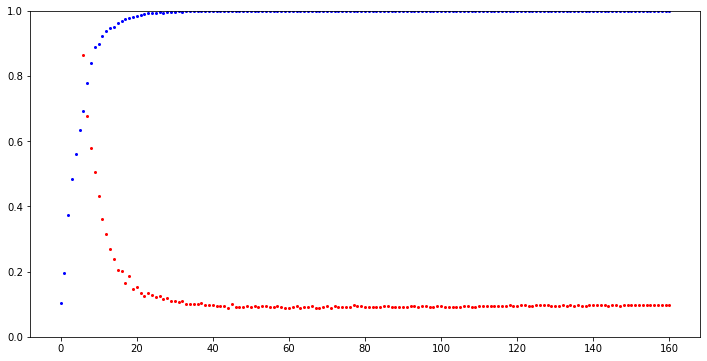

In [21]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim(0, 1)
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()